<a href="https://colab.research.google.com/github/obinnachike/Kyphosis_Disease/blob/main/KYPHOSIS_DISEASE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [ ]:
kyphosis_df = pd.read_csv("/content/kyphosis.csv")

In [ ]:
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
kyphosis_df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [ ]:
kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [ ]:
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


<Axes: xlabel='count', ylabel='Kyphosis'>

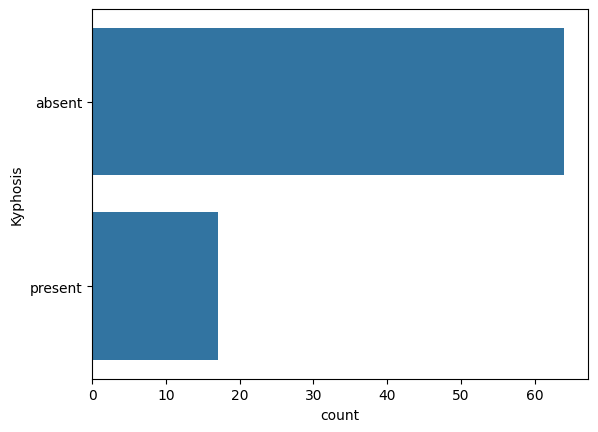

In [ ]:
sns.countplot(kyphosis_df['Kyphosis'], label = 'Count')

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

LabelEncoder_y = LabelEncoder()

kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(kyphosis_df['Kyphosis'])

In [ ]:
print(kyphosis_df['Kyphosis'].unique())
print(LabelEncoder_y.classes_)


[0 1]
['absent' 'present']


In [ ]:
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [ ]:
kyphosis_df.tail()

,Kyphosis,Age,Number,Start
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6
80,0,36,4,13


In [ ]:
kyphosis_false = kyphosis_df[kyphosis_df['Kyphosis']== 0]

In [ ]:
kyphosis_false.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16


In [ ]:
kyphosis_false.tail()

,Kyphosis,Age,Number,Start
74,0,11,3,15
75,0,178,4,15
77,0,26,7,13
78,0,120,2,13
80,0,36,4,13


In [ ]:
print('Percentage Number of Children without Kyphosis = ', (len(kyphosis_false)/len(kyphosis_df))* 100, '%')

Percentage Number of Children without Kyphosis =  79.01234567901234 %


In [ ]:
kyphosis_true = kyphosis_df[kyphosis_df['Kyphosis']== 1]

In [ ]:
kyphosis_true.head()

,Kyphosis,Age,Number,Start
2,1,128,4,5
9,1,59,6,12
10,1,82,5,14
21,1,105,6,5
22,1,96,3,12


In [ ]:
kyphosis_true.tail()

,Kyphosis,Age,Number,Start
57,1,120,5,8
60,1,130,4,1
61,1,114,7,8
76,1,157,3,13
79,1,42,7,6


In [ ]:
print('Percentage Number of Children with Kyphosis = ', (len(kyphosis_true)/len(kyphosis_df))* 100, '%')

Percentage Number of Children with Kyphosis =  20.98765432098765 %


<Axes: >

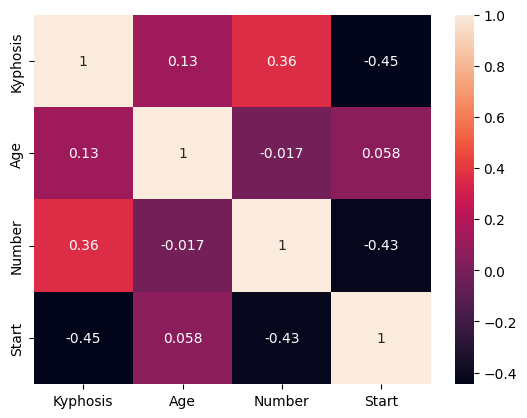

In [ ]:
sns.heatmap(kyphosis_df.corr(), annot = True)

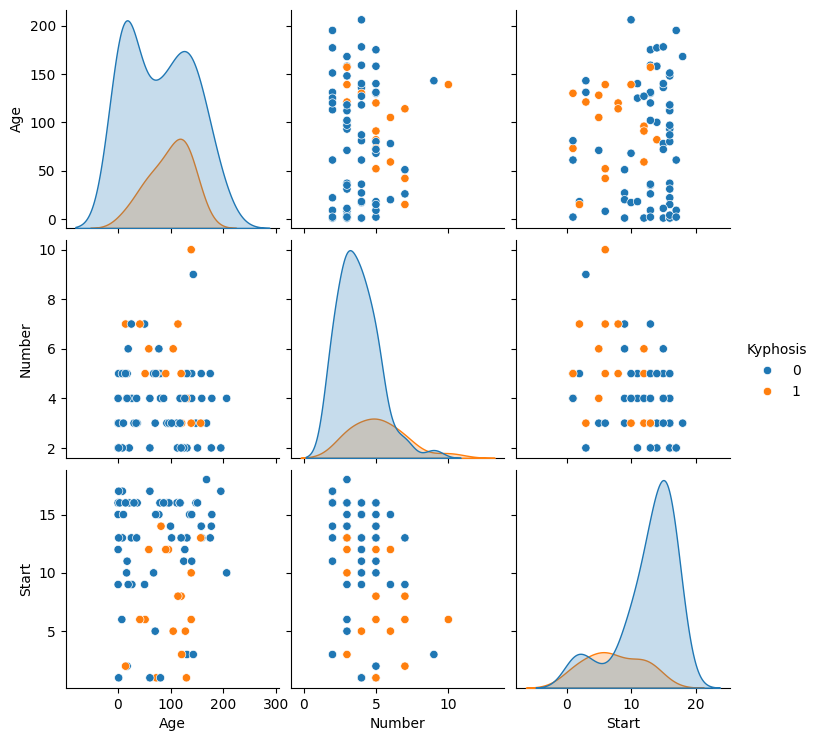

In [ ]:
sns.pairplot(kyphosis_df, hue = 'Kyphosis', vars = ['Age', 'Number', 'Start'])

In [ ]:
X = kyphosis_df.drop(['Kyphosis'], axis = 1)
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [ ]:
y = kyphosis_df['Kyphosis']

y

,Kyphosis
0,0
1,0
2,1
3,0
4,0
...,...
76,1
77,0
78,0
79,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
X_train.shape

(56, 3)

In [ ]:
y_train.shape

(56,)

In [ ]:
X_test.shape

(25, 3)

In [ ]:
y_test.shape

(25,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_test = decision_tree.predict(X_test)

y_pred_test

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1])

In [ ]:
y_test

,Kyphosis
69,0
78,0
55,0
38,0
23,0
56,0
48,1
41,0
25,0
28,0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
cm = confusion_matrix(y_pred_test, y_test)

<Axes: >

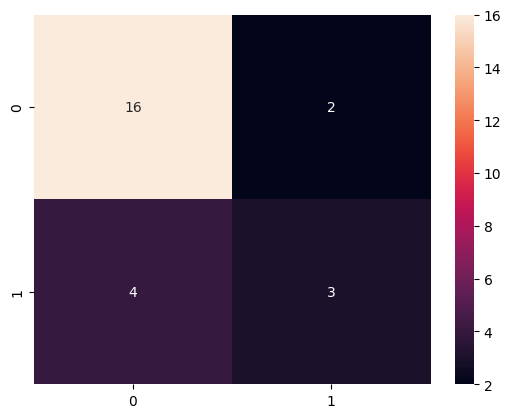

In [ ]:
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.43      0.60      0.50         5

    accuracy                           0.76        25
   macro avg       0.66      0.70      0.67        25
weighted avg       0.80      0.76      0.77        25



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 150)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [ ]:
rf_pred = rf.predict(X_test)

rf_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1])

In [ ]:
cm = confusion_matrix(rf_pred, y_test)

<Axes: >

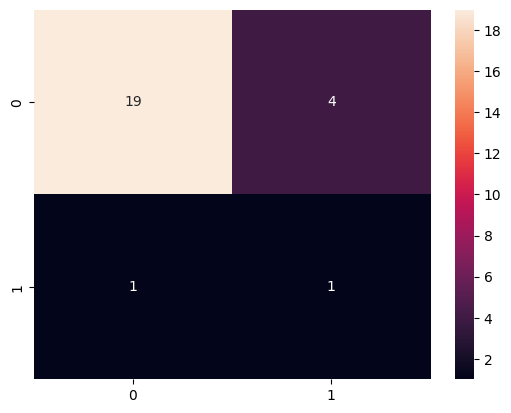

In [ ]:
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.50      0.20      0.29         5

    accuracy                           0.80        25
   macro avg       0.66      0.57      0.58        25
weighted avg       0.76      0.80      0.76        25

